<a href="https://colab.research.google.com/github/gopalbala/img-processing/blob/main/TextDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from imutils.object_detection import non_max_suppression

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp '/content/drive/MyDrive/frozen_east_text_detection.pb' ./

In [8]:
detector = '/content/frozen_east_text_detection.pb'
width, height = 320,320
images = '/content/cup.jpg'
min_confidence = 0.9


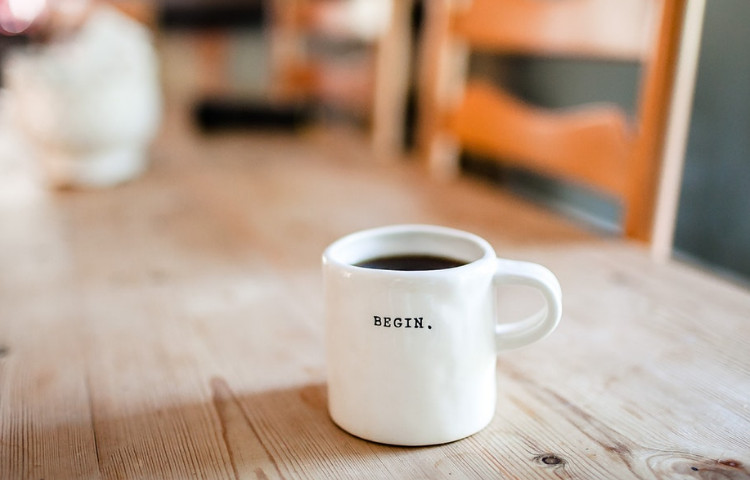

In [9]:
img = cv2.imread('/content/cup.jpg')
cv2_imshow(img)

In [50]:
original = img.copy

In [11]:
img.shape

(480, 750, 3)

In [12]:
h = img.shape[0]
w = img.shape[1]

In [13]:
prop_w = w/ float(width)
prop_h = h / float(height)
print(prop_w, prop_h)

2.34375 1.5


In [14]:
img = cv2.resize(img,(width,height))
img.size

307200

In [15]:
H = img.shape[0]
W = img.shape[1]
print(H, W)

320 320


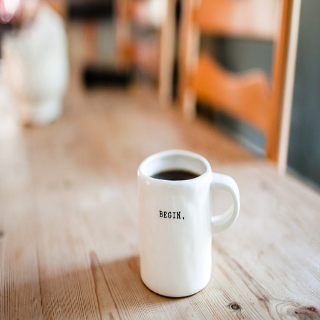

In [16]:
cv2_imshow(img)

In [17]:
layers = ['feature_fusion/Conv_7/Sigmoid','feature_fusion/concat_3']

In [18]:
neuralnet = cv2.dnn.readNet(detector)

In [19]:
img.shape

(320, 320, 3)

In [20]:
blob = cv2.dnn.blobFromImage(img,1.0, (W,H),swapRB=True, crop=False)

In [21]:
blob.shape

(1, 3, 320, 320)

In [22]:
neuralnet.setInput(blob)

In [35]:
scores, geometry = neuralnet.forward(layers)

In [24]:
scores

array([[[[1.4775183e-07, 5.3355325e-07, 6.1831190e-07, ...,
          2.3887444e-06, 2.1422467e-07, 1.9741562e-06],
         [2.2155248e-07, 8.2297476e-08, 1.5269326e-07, ...,
          3.8021703e-06, 2.4969086e-07, 2.0974837e-06],
         [2.4107598e-07, 2.5650635e-07, 6.7496660e-07, ...,
          4.4842459e-06, 6.0891395e-08, 2.5159140e-06],
         ...,
         [5.1902941e-07, 1.3470725e-07, 3.8078490e-08, ...,
          1.7954446e-06, 7.7535549e-07, 5.4700849e-06],
         [2.8565972e-07, 8.5580076e-08, 1.1289849e-07, ...,
          1.1354846e-06, 9.0157494e-07, 5.0782419e-06],
         [7.2199100e-08, 8.4333314e-09, 5.4603602e-09, ...,
          1.9142327e-07, 3.1659505e-07, 1.0240367e-07]]]], dtype=float32)

In [25]:
geomerty

array([[[[ 1.54848892e+02,  1.01938675e+02,  1.08211121e+02, ...,
           1.33965591e+02,  1.27577316e+02,  1.46967972e+02],
         [ 1.19407852e+02,  6.46941986e+01,  7.18581772e+01, ...,
           9.02676010e+01,  8.52865829e+01,  1.03320297e+02],
         [ 1.22548691e+02,  6.90612030e+01,  7.86800308e+01, ...,
           1.06369835e+02,  1.01670235e+02,  1.14973686e+02],
         ...,
         [ 1.16457314e+02,  4.99966507e+01,  3.75176544e+01, ...,
           8.21259842e+01,  8.12639847e+01,  1.21695618e+02],
         [ 1.27623383e+02,  5.88199654e+01,  4.84033051e+01, ...,
           8.31772232e+01,  8.09340973e+01,  1.11183907e+02],
         [ 1.26661522e+02,  7.53629608e+01,  6.93248215e+01, ...,
           1.27025345e+02,  1.18697968e+02,  1.47223724e+02]],

        [[ 1.09559761e+02,  9.52128754e+01,  9.08699265e+01, ...,
           1.00495575e+02,  9.43882065e+01,  1.12618622e+02],
         [ 8.27181091e+01,  5.77866745e+01,  5.62353096e+01, ...,
           6.53349609e

In [26]:
scores[0][0][0]

array([1.4775183e-07, 5.3355325e-07, 6.1831190e-07, 5.4498480e-07,
       6.8389460e-07, 6.3538363e-07, 2.8739106e-07, 1.1796508e-07,
       1.4145149e-07, 1.9870522e-07, 1.9250447e-07, 1.7849250e-07,
       3.2116756e-07, 1.1000186e-06, 1.8538535e-06, 7.2049903e-07,
       2.2694773e-07, 1.9305345e-07, 2.7782812e-07, 4.6434533e-07,
       5.4333816e-07, 6.3162935e-07, 6.5712828e-07, 6.7843467e-07,
       6.9376136e-07, 5.5208506e-07, 4.2479184e-07, 3.1016791e-07,
       4.7803371e-07, 4.5292870e-07, 5.1470943e-07, 5.0100130e-07,
       3.5401621e-07, 4.9244062e-07, 2.2611391e-06, 3.2066059e-06,
       2.2184138e-06, 1.9173272e-06, 1.9552849e-06, 2.5295287e-06,
       3.1743598e-06, 2.3743835e-06, 3.7373130e-07, 5.9925412e-08,
       7.6657173e-08, 1.3193031e-07, 1.9002201e-07, 3.2695496e-07,
       1.9928707e-07, 1.4942634e-07, 2.1175209e-07, 2.1544535e-07,
       2.3616482e-07, 3.0993047e-07, 3.7835929e-07, 4.7277859e-07,
       6.3466234e-07, 8.9479857e-07, 1.0728420e-06, 9.4951156e

In [27]:
geomerty[0][0][0]

array([154.84889 , 101.938675, 108.21112 , 110.35279 , 111.58001 ,
       113.07217 , 114.39852 , 116.147514, 115.30821 , 115.90372 ,
       117.41568 , 118.78156 , 116.54512 , 116.346   , 121.443306,
       129.47717 , 137.60803 , 143.02376 , 146.83208 , 149.02917 ,
       149.08723 , 148.28302 , 147.13014 , 145.16956 , 143.07384 ,
       140.95242 , 138.77011 , 137.29422 , 134.19771 , 131.39842 ,
       129.34822 , 127.54958 , 126.74279 , 125.23266 , 120.42207 ,
       117.427284, 116.221695, 116.09968 , 116.904205, 118.21094 ,
       119.18676 , 123.20284 , 125.417755, 126.3855  , 126.154854,
       126.19303 , 126.85886 , 126.928   , 128.21808 , 128.5202  ,
       128.97592 , 129.40462 , 130.3091  , 130.73267 , 130.80646 ,
       130.30138 , 129.3221  , 127.84739 , 126.378006, 125.06283 ,
       124.117935, 123.3759  , 122.265175, 120.858215, 120.00342 ,
       119.06399 , 117.834206, 116.9943  , 115.74399 , 117.56077 ,
       119.88263 , 121.395935, 125.46854 , 121.87916 , 120.994

In [28]:
scores.shape

(1, 1, 80, 80)

In [29]:
scores.shape[2:4]

(80, 80)

In [30]:
rows, columns = scores.shape[2:4]
print(rows, columns)

80 80


In [31]:
boxes = []
confidences = []

In [32]:
def geometric_data(geometry, y):
  xData0 = geometry[0, 0, y]
  xData1 = geometry[0, 1, y]
  xData2 = geometry[0, 2, y]
  xData3 = geometry[0, 3, y]
  angles_data = geometry[0, 4, y]
  return angles_data, xData0, xData1, xData2, xData3

In [33]:
def geometric_calculation(angles_data, xData0, xData1, xData2, xData3):
  (offsetX, offsetY) = (x * 4.0, y * 4.0)
  angle = angles_data[x]
  cos = np.cos(angle)
  sin = np.sin(angle)
  h = xData0[x] + xData2[x]
  w = xData1[x] + xData3[x]

  endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
  endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))

  beginX = int(endX - w)
  beginY = int(endY - h)

  return beginX, beginY, endX, endY

In [36]:
for y in range(0, rows):
  #print(y)
  data_scores = scores[0, 0, y]
  angles_data, xData0, xData1, xData2, xData3 = geometric_data(geometry, y)
  #print(data_scores)
  #print('-------')
  #print(angles_data, xData0, xData1, xData2, xData3)
  for x in range(0, columns):
    if data_scores[x] < min_confidence:
      continue

    beginX, beginY, endX, endY = geometric_calculation(angles_data, xData0, xData1, xData2, xData3)
    confidences.append(data_scores[x])
    boxes.append((beginX, beginY, endX, endY))

In [39]:
confidences

[0.9995617,
 0.99982554,
 0.9997718,
 0.9994678,
 0.96625125,
 0.96421045,
 0.9993309,
 0.99968016,
 0.99951243]

In [40]:
boxes

[(156, 208, 190, 220),
 (157, 208, 187, 220),
 (157, 208, 186, 220),
 (158, 207, 186, 220),
 (156, 207, 187, 221),
 (157, 207, 188, 220),
 (158, 208, 187, 221),
 (158, 208, 187, 221),
 (157, 208, 188, 221)]

In [41]:
detections = non_max_suppression(np.array(boxes), probs = confidences)

In [42]:
detections

array([[157, 208, 187, 220]])

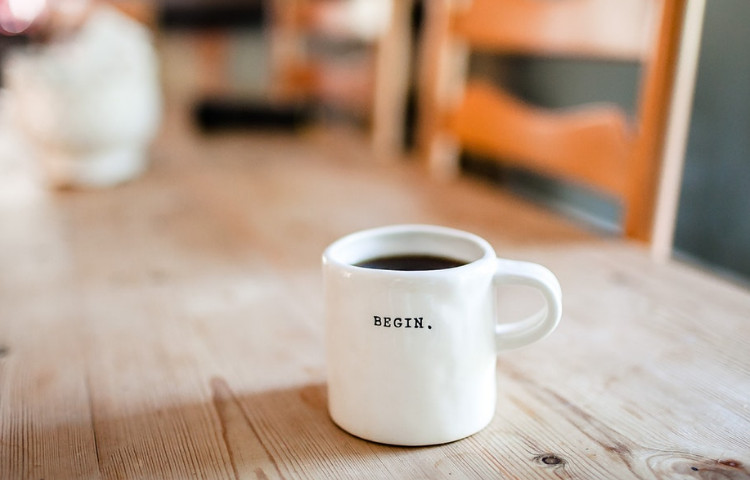

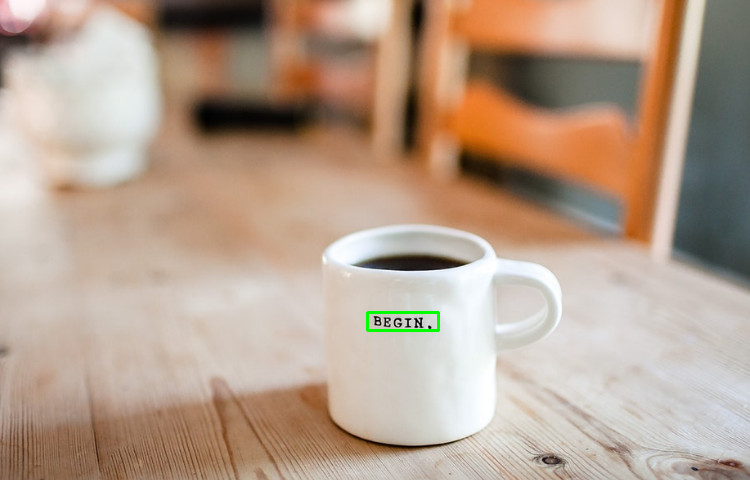

In [55]:
img1 = cv2.imread('/content/cup.jpg')
img_copy = img1.copy()
cv2_imshow(img1)
for (beginX, beginY, endX, endY) in detections:
  #print(beginX, beginY, endX, endY)
  beginX = int(beginX * prop_w)
  beginY = int(beginY * prop_h)
  endX = int(endX * prop_w)
  endY = int(endY * prop_h)

  # region of interest
  roi = img_copy[beginY:endY, beginX:endX]

  cv2.rectangle(img1, (beginX, beginY), (endX, endY), (0,255,0), 2)
cv2_imshow(img1)

In [56]:
cv2_imshow(roi)

In [57]:
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,489 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [58]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2025-03-02 16:01:22--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-03-02 16:01:22--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-03-02 16:01:23--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

In [61]:
config_tesseract = "--tessdata-dir tessdata --psm 7"

BEGIN.



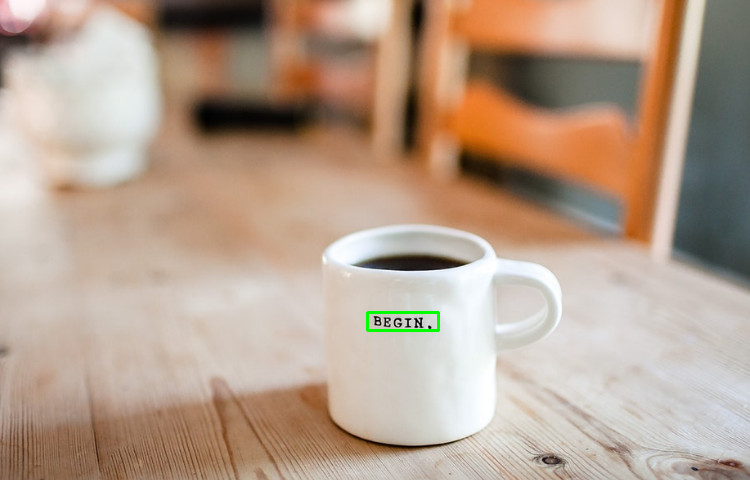

In [63]:
img1 = cv2.imread('/content/cup.jpg')
img_copy = img1.copy()
for (beginX, beginY, endX, endY) in detections:
  beginX = int(beginX * prop_w)
  beginY = int(beginY * prop_h)
  endX = int(endX * prop_w)
  endY = int(endY * prop_h)

  roi = img_copy[beginY:endY, beginX:endX]
  text = pytesseract.image_to_string(roi, lang = 'eng', config=config_tesseract)
  print(text)

  cv2.rectangle(img1, (beginX, beginY), (endX, endY), (0,255,0), 2)
cv2_imshow(img1)